<a href="https://colab.research.google.com/github/rnop/Mental-Health-Project/blob/main/Mental_Health_Project_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Mental Health in the Tech Industry

### Introduction
Mental health encompasses our emotional and psychological well-being that influences the way we perceive and behave to the environment around us. Some of us are stressed, overworked, struggling with new environments, or afraid of uncertainty. But thinking proactively about mental health can help improve your experiences and overall well-being. Having positive mental health will allow you to unlock your full potential and allow you to work effectively against the challenges that await you in life.

### The Data Set
The data comes from the Open Source Mental Illness (OSMI) non-profit organization (https://osmihelp.org/) and contains 105 questions that were asked to individuals working in the tech industry from 2014 to 2019. 

The relational database contains 3 tables: 
* Question - lists 105 questions asked in the survey
* Answer - contains each user's answers to survey questions
* Survey - defines the year the survey was conducted

### Libraries
* SQL 
* Pandas 
* Matplotlib
* Seaborn 

In [99]:
import sqlite3
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [100]:
# Open connection to db
conn = sqlite3.connect('mental_health.sqlite')

In [101]:
def print_schema(table_name, connection):
  cur = connection.cursor()
  query = "pragma table_info({})".format(table_name)
  table_info = cur.execute(query).fetchall()
  print("Table Schema for:", table_name)
  for row in table_info:
    print(row)
  print()
  cur.close()

print_schema('Answer', conn)
print_schema('Question', conn)
print_schema('Survey', conn)

Table Schema for: Answer
(0, 'AnswerText', 'VARCHAR(10000)', 0, None, 0)
(1, 'SurveyID', 'INTEGER', 0, None, 0)
(2, 'UserID', 'INTEGER', 0, None, 0)
(3, 'QuestionID', 'INTEGER', 0, None, 0)

Table Schema for: Question
(0, 'questiontext', 'VARCHAR(1000)', 0, None, 0)
(1, 'questionid', 'INTEGER', 0, None, 0)

Table Schema for: Survey
(0, 'SurveyID', 'INTEGER', 1, None, 1)
(1, 'Description', 'VARCHAR(255)', 0, None, 0)



In [102]:
# Answer Table
query = """
        SELECT * FROM Answer 
        """
answer_df = pd.read_sql(query, conn)
print(answer_df.shape)
answer_df.head()

(236898, 4)


,AnswerText,SurveyID,UserID,QuestionID
0,37,2014,1,1
1,44,2014,2,1
2,32,2014,3,1
3,31,2014,4,1
4,31,2014,5,1


In [103]:
# Question Table
query = """
        SELECT * FROM Question 
        """
question_df = pd.read_sql(query, conn)
print(question_df.shape)
question_df.head()

(105, 2)


,questiontext,questionid
0,What is your age?,1
1,What is your gender?,2
2,What country do you live in?,3
3,"If you live in the United States, which state ...",4
4,Are you self-employed?,5


In [104]:
# Survey Table
query = """
        SELECT * FROM Survey 
        LIMIT 3
        """
survey_df = pd.read_sql(query, conn)
print(survey_df.shape)
survey_df.head()

(3, 2)


,SurveyID,Description
0,2014,mental health survey for 2014
1,2016,mental health survey for 2016
2,2017,mental health survey for 2017


### Join Question and Answer Tables

In [105]:
query = """
        SELECT q.questiontext, a.AnswerText, a.UserID, a.SurveyID 
        FROM Question AS q
        INNER JOIN Answer as a
          ON q.questionid = a.QuestionID 
        ORDER BY a.UserID, q.questionid
        """
df = pd.read_sql(query, conn)
df.head()

,questiontext,AnswerText,UserID,SurveyID
0,What is your age?,37,1,2014
1,What is your gender?,Female,1,2014
2,What country do you live in?,United States,1,2014
3,"If you live in the United States, which state ...",Illinois,1,2014
4,Are you self-employed?,-1,1,2014


### Count Unique Number of Users and Unique Number of Questions

In [106]:
query = """
        SELECT COUNT(DISTINCT UserID) AS Number_Unique_Users,
               COUNT(DISTINCT QuestionID) AS Number_Unique_Questions
        FROM Answer
        """
counts = pd.read_sql(query, conn)
counts

,Number_Unique_Users,Number_Unique_Questions
0,4218,105


### Check for Missing Answer Values

In [107]:
query = """
        SELECT q.questiontext, a.AnswerText, a.UserID, a.SurveyID FROM Question AS q
        INNER JOIN Answer as a
          ON q.questionid = a.QuestionID
        WHERE a.AnswerText IS NULL
        ORDER BY a.UserID, q.questionid
        """
nulls = pd.read_sql(query, conn)
nulls

,questiontext,AnswerText,UserID,SurveyID


### List of All the Questions:

In [108]:
print("List of Questions:")
for idx, question in enumerate(df['questiontext'].unique()):
  print(idx+1, question)

List of Questions:
1 What is your age?
2 What is your gender?
3 What country do you live in?
4 If you live in the United States, which state or territory do you live in?
5 Are you self-employed?
6 Do you have a family history of mental illness?
7 Have you ever sought treatment for a mental health disorder from a mental health professional?
8 How many employees does your company or organization have?
9 Is your employer primarily a tech company/organization?
10 Does your employer provide mental health benefits as part of healthcare coverage?
11 Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?
12 Would you bring up a mental health issue with a potential employer in an interview?
13 Do you think that discussing a physical health issue with your employer would have negative consequences?
14 Do you feel that your employer takes mental health as seriously as physical health?
15 If you have a mental h

### Count Yearly Responders

   SurveyID  Responders
0      2014        1260
1      2016        1433
2      2017         756
3      2018         417
4      2019         352



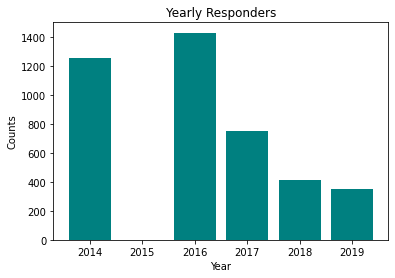

In [109]:
query = """
        SELECT SurveyID, 
              COUNT(DISTINCT UserID) AS Responders
        FROM Answer
        GROUP BY SurveyID
        ORDER BY SurveyID
        """

yearly_responders = pd.read_sql(query, conn)
yearly_responders.to_csv('yearly_responders.csv')

print(yearly_responders)
print()
plt.bar(yearly_responders['SurveyID'], yearly_responders['Responders'], color='teal')
plt.title("Yearly Responders")
plt.xlabel('Year')
plt.ylabel('Counts')
plt.show()

### Mental Health Questions
* (7) Have you ever sought treatment for a mental health disorder from a mental health professional?
* (46) Have you had a mental health disorder in the past?
* (47) Do you currently have a mental health disorder?
* (48) Have you ever been diagnosed with a mental health disorder?

For simplicity, I am going to diagnose people with mental health issues (even if it slight) using question 7 (Have you ever sought treatment for a mental health disorder from a mental health professional?). I believe just the idea of seeking treatment for mental health suggests an issue even if it is small. A lot of people go through mental health problems without seeking help so I believe this will give a better general sense of the population truly experience mental health issues. 

Mental Health Diagnosis
By Count
Yes    2412
No     1806
Name: Mental_Health_Diagnosis, dtype: int64

By Percentage
Yes    0.571835
No     0.428165
Name: Mental_Health_Diagnosis, dtype: float64



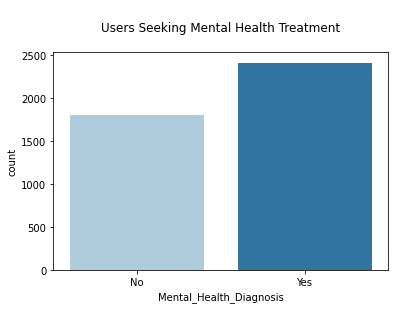

In [110]:
query = """
        SELECT AnswerText as Mental_Health_Diagnosis
        FROM Question q
        INNER JOIN Answer as a
          ON q.questionid = a.QuestionID 
        WHERE questiontext = 'Have you ever sought treatment for a mental health disorder from a mental health professional?'
        """
mental_health_diagnosis = pd.read_sql(query, conn)
mental_health_diagnosis['Mental_Health_Diagnosis'] = mental_health_diagnosis['Mental_Health_Diagnosis'].map({'1': 'Yes', '0': 'No'})
mental_health_diagnosis.to_csv('mental_health_diagnosis.csv')

print("Mental Health Diagnosis")
print("By Count")
print(mental_health_diagnosis['Mental_Health_Diagnosis'].value_counts(0))
print()
print("By Percentage")
print(mental_health_diagnosis['Mental_Health_Diagnosis'].value_counts(1))
print()
plt.title("\nUsers Seeking Mental Health Treatment\n")
sns.countplot(x=mental_health_diagnosis['Mental_Health_Diagnosis'], palette='Paired')
plt.show()

### Gender Responses

In [111]:
query = """
        WITH Gender AS (
        SELECT UserID, 
        (CASE 
            WHEN UPPER(AnswerText) LIKE "%FEMALE%" THEN "Female"
            WHEN UPPER(AnswerText) LIKE "%MALE%" THEN "Male"
            WHEN UPPER(AnswerText) LIKE "%BI%" THEN "Trans/Bi/Queer"
            WHEN UPPER(AnswerText) LIKE "%QUEER%" THEN "Trans/Bi/Queer"
            WHEN UPPER(AnswerText) LIKE "%TRANS%" THEN "Trans/Bi/Queer"
            ELSE "Other"
        END) AS GenderTag
        FROM Answer
        WHERE QuestionID = 2
        ORDER BY GenderTag
        )
        SELECT GenderTag, COUNT(DISTINCT UserID) AS GenderCount
        FROM Gender
        GROUP BY GenderTag
        ORDER BY GenderCount
        """
gender = pd.read_sql(query, conn)
gender.to_csv('gender.csv')
gender

,GenderTag,GenderCount
0,Trans/Bi/Queer,48
1,Other,80
2,Female,1037
3,Male,3053


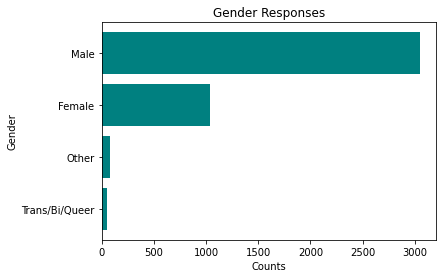

In [112]:
plt.barh(gender['GenderTag'], gender['GenderCount'], color='teal')
plt.title("Gender Responses")
plt.xlabel('Counts')
plt.ylabel('Gender')
plt.show()

* Important to note that Males overwhelmingly outnumber the other gender responses. This is not surprising as the tech industry is dominantly male.
* Trans/Bi/Queer was binned together as the number of gender responses for each individual group was quite small

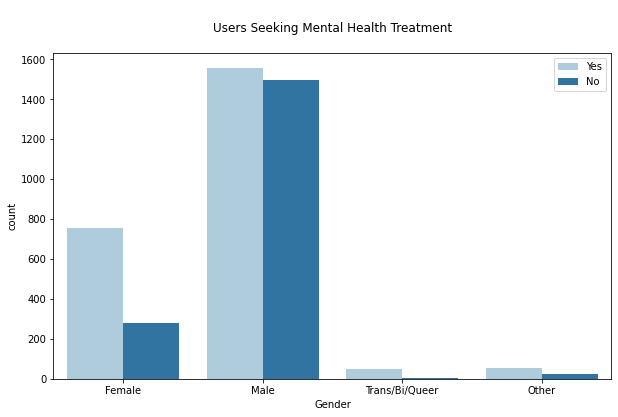

In [113]:
query = """SELECT UserID, 
        (CASE 
            WHEN UPPER(AnswerText) LIKE "%BI%" THEN "Trans/Bi/Queer"
            WHEN UPPER(AnswerText) LIKE "%QUEER%" THEN "Trans/Bi/Queer"
            WHEN UPPER(AnswerText) LIKE "%TRANS%" THEN "Trans/Bi/Queer"
            WHEN UPPER(AnswerText) LIKE "%FEMALE%" THEN "Female"
            WHEN UPPER(AnswerText) LIKE "%MALE%" THEN "Male"
            ELSE "Other"
        END) AS GenderTag
        FROM Answer
        WHERE QuestionID = 2
        """
gendertag = pd.read_sql(query, conn)
mh_by_gender = df[df['questiontext']=='Have you ever sought treatment for a mental health disorder from a mental health professional?']
mh_by_gender['GenderTag'] = gendertag['GenderTag'].values
mh_by_gender[['AnswerText', 'GenderTag']].to_csv('mh_by_gender.csv')

plt.figure(figsize=(10,6))
plt.title("\nUsers Seeking Mental Health Treatment\n")
sns.countplot(x=mh_by_gender['GenderTag'], hue=mh_by_gender['AnswerText'], palette='Paired')
plt.legend(["Yes","No"], loc='upper right')
plt.xlabel("Gender")
plt.show()

* The overwhelming majority of Females (73% vs 27%) reported experiencing mental health issues 
* There seems to be an even split among Males (51% vs 49%) reporting mental health issues
* The overwhelming majority of Trans/Bi/Queer individuals (89% vs 11%) reported experiencing mental health issues

In [114]:
# Counts and Percentages of Mental Health Diagnosis by Gender
gender_list = mh_by_gender['GenderTag'].value_counts().index
for gender in gender_list:
  print(gender)
  print("By Count:")
  print(mh_by_gender[mh_by_gender['GenderTag']==gender]['AnswerText'].value_counts(0))
  print("By Percentage:")
  print(mh_by_gender[mh_by_gender['GenderTag']==gender]['AnswerText'].value_counts(1))
  print()

Male
By Count:
1    1554
0    1497
Name: AnswerText, dtype: int64
By Percentage:
1    0.509341
0    0.490659
Name: AnswerText, dtype: float64

Female
By Count:
1    752
0    279
Name: AnswerText, dtype: int64
By Percentage:
1    0.729389
0    0.270611
Name: AnswerText, dtype: float64

Other
By Count:
1    56
0    24
Name: AnswerText, dtype: int64
By Percentage:
1    0.7
0    0.3
Name: AnswerText, dtype: float64

Trans/Bi/Queer
By Count:
1    50
0     6
Name: AnswerText, dtype: int64
By Percentage:
1    0.892857
0    0.107143
Name: AnswerText, dtype: float64



### What is your age?

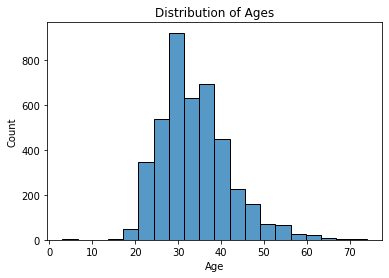

In [115]:
query = """
        SELECT CAST(AnswerText AS INT) AS Age
        FROM Answer
        JOIN Question 
        ON Answer.QuestionID = Question.questionid
        WHERE questiontext LIKE 'What is your age?'
        AND Age > 0 AND Age < 80
        """
agerange = pd.read_sql(query, conn)
plt.title('Distribution of Ages')
sns.histplot(agerange['Age'], bins=20, palette='Paired')
plt.show()

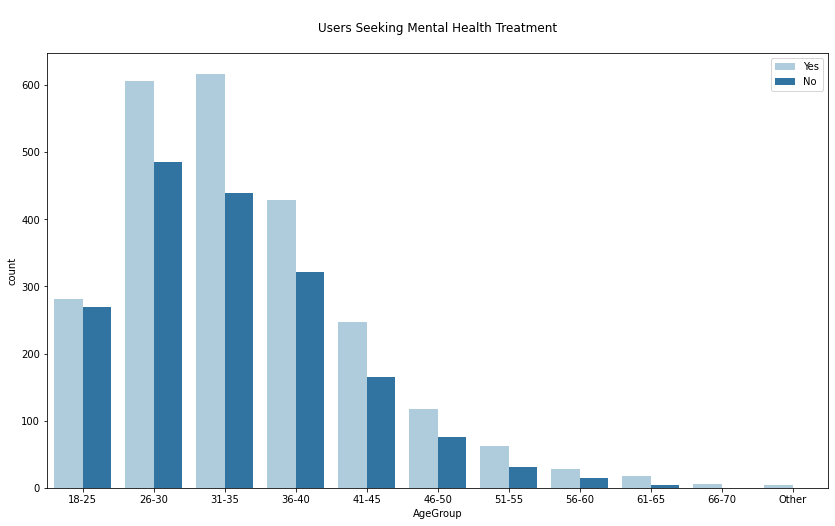

In [116]:
query = """
        SELECT UserID, 
              (CASE
                    WHEN AnswerText <= 25 THEN "18-25"
                    WHEN AnswerText > 25 AND AnswerText <= 30 THEN "26-30"
                    WHEN AnswerText > 30 AND AnswerText <= 35 THEN "31-35"
                    WHEN AnswerText > 35 AND AnswerText <= 40 THEN "36-40"
                    WHEN AnswerText > 40 AND AnswerText <= 45 THEN "41-45"
                    WHEN AnswerText > 45 AND AnswerText <= 50 THEN "46-50"
                    WHEN AnswerText > 50 AND AnswerText <= 55 THEN "51-55"
                    WHEN AnswerText > 55 AND AnswerText <= 60 THEN "56-60"
                    WHEN AnswerText > 60 AND AnswerText <= 65 THEN "61-65"
                    WHEN AnswerText > 65 AND AnswerText <= 70 THEN "66-70"
                    ELSE "Other"
              END) AS AgeGroup
        FROM Answer
        WHERE QuestionID = 1
        """

AgeGroup_df = pd.read_sql(query, conn)

mh_by_agegroup = df[df['questiontext']=='Have you ever sought treatment for a mental health disorder from a mental health professional?']
mh_by_agegroup['AgeGroup'] = AgeGroup_df['AgeGroup'].values
agegroup_list = mh_by_agegroup['AgeGroup'].value_counts().index
bin_order = ['18-25', '26-30', '31-35','36-40','41-45','46-50','51-55','56-60','61-65','66-70','Other']

plt.figure(figsize=(14,8))
plt.title("\nUsers Seeking Mental Health Treatment\n")
sns.countplot(x=mh_by_agegroup['AgeGroup'], hue=mh_by_agegroup['AnswerText'], palette='Paired', order=bin_order)
plt.legend(['Yes','No'], loc='upper right')
plt.show()

* Looks like mental health issues affect every age group 

In [117]:
# Close connection to db
conn.close()

### Conclusion
It is clear that mental health issues can affect any individual regardless of age and gender. What is alarming is that the groups that are seemingly mostly affected are minority and underrepresented groups. I believe it is important for employers to understand the affects of mental health among their employees. Having a proactive mindset to combat a lot of the problems that affect mental health which can help create a healthier, productive environment in the workplace. 

#### Further thoughts
There are many questions left to answer especially with this dataset (there are over 100 questions!). It would be very interesting to look at the other the analysis of other responses such as mental health by race, size of the company, and country they live/work in. 